# Programacio en Python -- Exercici 1

**Especifiqueu en una cel·la tipus markdown totes aquelles sentències SQL que són necessàries executar a DBeaver per a que el vostre codi funcioni.** 

Podeu decorar codi SQL usant:

\`\`\`SQL


\`\`\`


In [58]:
import nltk
import spacy
import re
import os
from math import log, exp
from nltk.collocations import TrigramCollocationFinder


In [ ]:
def preprocessing(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        raw_text = file.read()
    cleaned_text = re.sub(r'(\d)[.:](\d)', r'\1\2', raw_text) # Eliminar simbols adjacents tambe dp
    cleaned_text = re.sub(r'\d+', '', cleaned_text)  # Remove digits
    cleaned_text = re.sub(r'[ \t]+', ' ', cleaned_text)
    cleaned_text = cleaned_text.lower()  # Convert to lowercase
    #nltk_sent = nltk.sent_tokenize(cleaned_text)
    #result = "  ".join(nltk_sent)
    cleaned_text = cleaned_text.replace("\n", "  ")
    cleaned_text = re.sub(r' {2,}', '  ', cleaned_text)
    cleaned_text = '  ' + cleaned_text.strip() + '  '
    #print(cleaned_text)
    #with open("result.txt", "w") as file:
    #    file.write(cleaned_text)
    return cleaned_text

#with open('result.txt', 'w') as file:
#    file.write(preprocessing('langId/spa_trn.txt'))

In [ ]:
directory_path = 'langId'
traductor = dict()

for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)

    if os.path.isfile(file_path) and filename.endswith('trn.txt'):
        print(f"Found file: {filename}")

        text = preprocessing(file_path) 
        finder = TrigramCollocationFinder.from_words(text)
        B = len(finder.ngram_fd)
        finder.apply_freq_filter(5)
        trad = finder.ngram_fd
        trad['B'] = B
        trad['N'] = sum(trad.values())

        traductor[filename[:3]] = trad


Found file: deu_trn.txt
Found file: eng_trn.txt
Found file: fra_trn.txt
Found file: ita_trn.txt
Found file: nld_trn.txt
Found file: spa_trn.txt


In [71]:
directory_path = 'langId'
test_results = dict()

for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)

    if os.path.isfile(file_path) and filename.endswith('tst.txt'):
        print(f"Found file: {filename}")

        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
        #text = preprocessing(file_path)
        text = text.split('\n')
        text.pop() # L'ultim es un espai, no es una frase

        for frase in text:
            finder = TrigramCollocationFinder.from_words(frase)
            l.append(finder.ngram_fd)
        test_results[filename[:3]] = l

Found file: deu_tst.txt
Found file: eng_tst.txt
Found file: fra_tst.txt
Found file: ita_tst.txt
Found file: nld_tst.txt
Found file: spa_tst.txt


In [73]:
def lidstone(trad_idioma, res, lambd):
    tot = 0
    for k, v in res.items():
        tot += v*log((trad_idioma[k] + lambd)/(trad_idioma['N'] + lambd*trad_idioma['B']))
    return tot

def prob_idioma(trad, res, lambd):
    idiomas = dict()
    for k, v in trad.items():
        idiomas[k] = lidstone(v, res, lambd)
    return idiomas

In [ ]:
from sklearn.metrics import confusion_matrix
print()
y_pred = []
y_real = []

for idioma_real, l_sent in test_results.items():
    print(idioma_real)
    #with open('langId/' + idioma_real + '_tst.txt', 'r', encoding='utf-8') as file:
    #    text = file.read()
    #text = preprocessing(file_path)
    #text = text.split('\n')
    
    for sent in l_sent:
        idiomes_pred = prob_idioma(traductor, sent, 0.5)
        idioma_pred = max(idiomes_pred, key=idiomes_pred.get)
        #print(idioma_real, idioma_pred, idiomes_pred[idioma_pred])

        #if idioma_pred != idioma_real:
        #    print(idioma_pred, idiomes_pred[idioma_pred], idiomes_pred, text[l_sent.index(sent)])
        
        y_pred.append(idioma_pred)
        y_real.append(idioma_real)
    print()

cm = confusion_matrix(y_real, y_pred)

print(cm)


deu


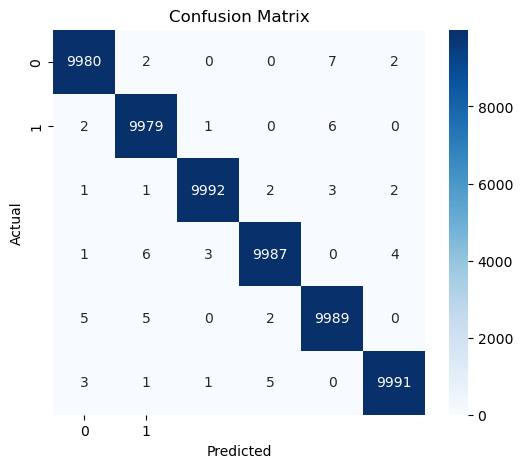

In [47]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_real, y_pred)
#precision_micro = precision_score(y_real, y_pred, average='micro')
#recall_macro = recall_score(y_real, y_pred, average='macro')
#f1_weighted = f1_score(y_real, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
#print(f"Micro Precision: {precision_micro}")
#print(f"Macro Recall: {recall_macro}")
#print(f"Weighted F1-Score: {f1_weighted}")

Accuracy: 0.99891635963523


In [ ]:
from sklearn.model_selection import GridSearchCV
